<a href="https://colab.research.google.com/github/Data-Intelligence-Mastery/data_science_interview_questions/blob/master/Q001_Marketing_attribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Suppose you’re working at a company similar to Zillow, and the marketing team has come to you to help them figure out which channels (excluding direct) are best for them to focus on. You are given a dataset, which can be found [here](https://github.com/Data-Intelligence-Mastery/data_science_interview_questions/blob/master/Q001/zillow_test_data.csv).

Below are the column descriptions for the dataset.

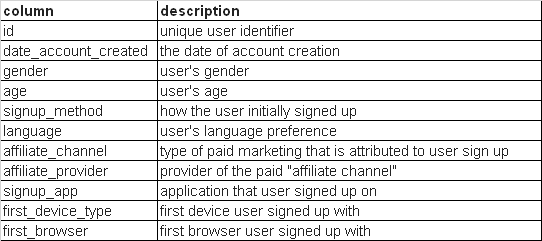

Using the dataset above, can you help them make a recommendation to the team re: the most effective marketing channels?

In [166]:
import pandas as pd

url = 'https://raw.githubusercontent.com/Data-Intelligence-Mastery/data_science_interview_questions/master/Q001/zillow_test_data.csv?token=AO4XOPLEBB7HQCXZTWAJ2U26O3CVW'
df = pd.read_csv(url)
df.head()

,id,date_account_created,gender,age,signup_method,language,affiliate_channel,affiliate_provider,signup_app,first_device_type,first_browser
0,5uwns89zhp,7/1/2019,F,35.0,FACEBOOK,en,direct,direct,Moweb,iPhone,Mobile Safari
1,jpl0dijy5j,7/1/2019,NaN,NaN,BASIC,en,direct,direct,Moweb,iPhone,Mobile Safari
2,xx0ulxorjp,7/1/2019,NaN,NaN,BASIC,en,direct,direct,Web,Windows Desktop,Chrome
3,6c6puo6ix0,7/1/2019,NaN,NaN,BASIC,en,direct,direct,Web,Windows Desktop,IE
4,czqhjk3yfe,7/1/2019,NaN,NaN,BASIC,en,direct,direct,Web,Mac Desktop,Safari


In [167]:
len(df) # view the number of observations

62096

In [170]:
df_grouped = df.groupby('affiliate_channel').count()
df_grouped

,id,date_account_created,gender,age,signup_method,language,affiliate_provider,signup_app,first_device_type,first_browser
affiliate_channel,,,,,,,,,,
content,170,170,89,94,170,170,170,170,170,168
direct,43844,43844,18987,22172,43844,43844,43844,43844,43844,27037
other,586,586,290,320,586,586,586,586,586,519
remarketing,172,172,77,88,172,172,172,172,172,171
sem-brand,10394,10394,5052,6134,10394,10394,10394,10394,10394,10233
sem-non-brand,1231,1231,518,639,1231,1231,1231,1231,1231,1224
seo,5699,5699,3291,3773,5699,5699,5699,5699,5699,5616


In [171]:
df_grouped['id'].sum() # confirm all channels sum up to the total observations from above!

62096

After we confirm the groupby method, we can draw insights from the results. 
It looks like 'sem-brand' attracted most signups, therefore Zillow should focus on 'sem-brand' channel.


In [172]:
df.groupby('affiliate_channel').groups  # it's a dict


{'content': Int64Index([  153,   221,   812,   882,   890,   962,  1298,  1401,  1405,
              1527,
             ...
             60887, 61196, 61429, 61444, 61448, 61456, 61502, 61623, 61647,
             62043],
            dtype='int64', length=170),
 'direct': Int64Index([    0,     1,     2,     3,     4,     6,     7,     8,    10,
                11,
             ...
             62081, 62083, 62084, 62085, 62086, 62088, 62089, 62091, 62092,
             62093],
            dtype='int64', length=43844),
 'other': Int64Index([  114,   310,   370,   485,   530,   537,   912,   959,   997,
              1326,
             ...
             60330, 60343, 60872, 60996, 61526, 61556, 61780, 61873, 61936,
             62095],
            dtype='int64', length=586),
 'remarketing': Int64Index([   55,   101,   262,   344,   679,   880,   994,  1314,  1580,
              1622,
             ...
             55998, 56672, 56848, 57145, 57566, 57570, 58721, 59275, 60228,
             6

Let's find out which signup method is most popular through the best channel you identified above.


In [173]:
df.groupby(['affiliate_channel','signup_method']).count() 

id  ...  first_browser
affiliate_channel signup_method         ...               
content           BASIC            100  ...            100
                  FACEBOOK          70  ...             68
direct            BASIC          31671  ...          21595
                  FACEBOOK       10295  ...           5326
                  GOOGLE          1856  ...            114
                  WEB               22  ...              2
other             BASIC            404  ...            369
                  FACEBOOK         170  ...            150
                  GOOGLE            12  ...              0
remarketing       BASIC            128  ...            127
                  FACEBOOK          44  ...             44
sem-brand         BASIC           8294  ...           8204
                  FACEBOOK        2082  ...           2028
                  GOOGLE            18  ...              1
sem-non-brand     BASIC            989  ...            984
                  FACEBOOK         241  ...            240
                  GOOGLE             1  ...              0
seo               BASIC           3739  ...           3692
                  FACEBOOK        1954  ...           1922
                  GOOGLE             5  ...              1
                  WEB                1  ...              1

[21 rows x 9 columns]

In [174]:
# It looks like 'BASIC' method is the most popular one through the 'sem-brand' channel.
df_date = df.groupby('date_account_created').count()
df_date.sort_values(by='id',ascending=False)

,id,gender,age,signup_method,language,affiliate_channel,affiliate_provider,signup_app,first_device_type,first_browser
date_account_created,,,,,,,,,,
7/23/2019,1105,484,546,1105,1105,1105,1105,1105,1105,757
7/22/2019,1052,461,541,1052,1052,1052,1052,1052,1052,692
7/17/2019,978,458,518,978,978,978,978,978,978,696
7/24/2019,923,420,484,923,923,923,923,923,923,614
7/18/2019,892,423,492,892,892,892,892,892,892,586
...,...,...,...,...,...,...,...,...,...,...
7/6/2019,475,209,248,475,475,475,475,475,475,383
7/12/2019,472,202,249,472,472,472,472,472,472,389
7/4/2019,445,212,255,445,445,445,445,445,445,350


In [175]:
import numpy as np

df_index = df.groupby('signup_method').groups # the output is the index of different signup method

df_index # it's a dict

{'BASIC': Int64Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,
                10,
             ...
             62086, 62087, 62088, 62089, 62090, 62091, 62092, 62093, 62094,
             62095],
            dtype='int64', length=45325),
 'FACEBOOK': Int64Index([    0,    12,    19,    22,    31,    33,    36,    44,    48,
                49,
             ...
             62054, 62056, 62069, 62070, 62075, 62076, 62081, 62083, 62084,
             62085],
            dtype='int64', length=14856),
 'GOOGLE': Int64Index([   78,   130,   247,   255,   319,   331,   345,   659,   836,
               841,
             ...
             61912, 61938, 61965, 61966, 61981, 61995, 61998, 62016, 62029,
             62066],
            dtype='int64', length=1892),
 'WEB': Int64Index([36632, 48774, 49508, 50836, 51254, 51280, 51633, 52693, 53060,
             53610, 53670, 53781, 53800, 55270, 56572, 57498, 57880, 58110,
             58850, 59299, 59327, 60969, 61917],
      

In [176]:
# Calculate the average age of different signup method
avg_age = {}
for key, value in df_index.items():
  avg_age[key] = round(df.loc[value,'age'].mean(),1)
avg_age

# It looks like there are typos of ages in Google group, let's dig a little deeper

{'BASIC': 39.6, 'FACEBOOK': 33.5, 'GOOGLE': 103.6, 'WEB': 20.7}

In [177]:

df_age = df.loc[df_index['GOOGLE'],'age']
df_age_google = df_age[df_age.notna()]
df_age_google.sort_values(ascending=False)

# Let's remove all the ages larger than 100 years old
round(df_age_google[df_age_google<100].mean(),1)

32.2

In [178]:
# Another easy way to calcualte while remove all the ages that's higher than 100 years old
df_ = df[df['age']<100]
df_.groupby('signup_method').agg(np.mean).round(1)

,age
signup_method,
BASIC,35.1
FACEBOOK,33.0
GOOGLE,32.2
WEB,20.7
